In [190]:
import matplotlib_inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [191]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [192]:
df.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [193]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [194]:
#checking for null values
df.isnull().sum()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

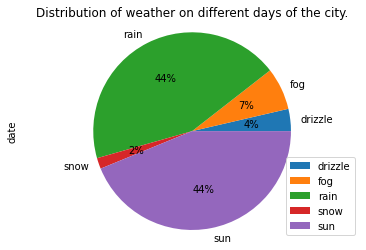

In [195]:
df.groupby('weather').count().plot(kind='pie', y='date', autopct='%1.0f%%')
plt.legend(loc='lower right')
plt.title('Distribution of weather on different days of the city.')
plt.gca().axis("equal")

labels=df.weather.unique()
plt.show()


c:\Users\murar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='temp_min', ylabel='temp_max'>

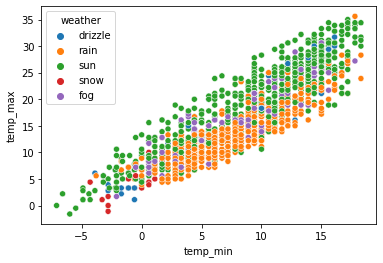

In [198]:
#to see the effect of temperature on when it will rain
sns.scatterplot(df.temp_min,df.temp_max,hue=df.weather)

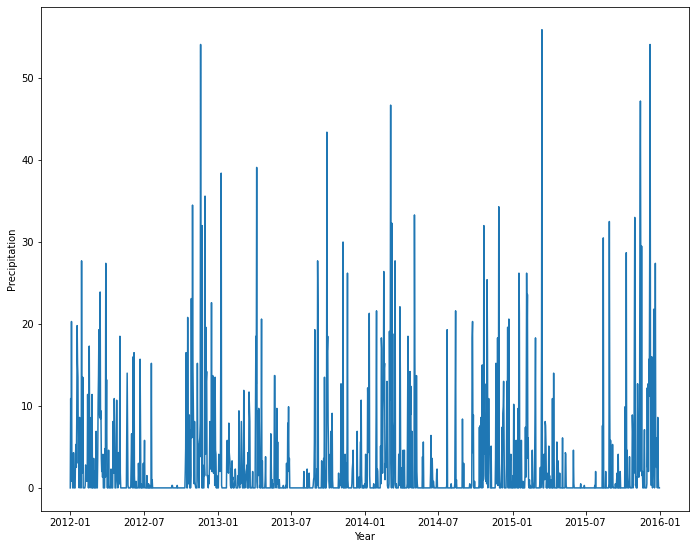

In [187]:
#plot to show distribution of precipitation over the years
import datetime
fig = plt.figure(figsize=(9.0, 7.0))
plt.title('Distribution of precipitation over the years')
ax = fig.add_axes([0,0,1,1])
df['date'] = pd.to_datetime(df['date']).dt.date
plt.xlabel('Year') 
plt.ylabel('Precipitation') 
# We will pass in both the date and precipitation amounts which contain the x and y values respectively
ax.plot(df.date, df.precipitation)

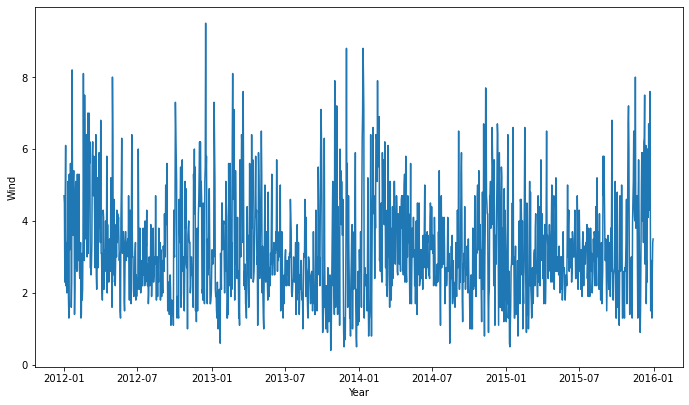

In [188]:
#plot to show distribution of wind speed over the years
import datetime as dt
fig = plt.figure(figsize=(9.0, 5.0))
plt.title('Distribution of wind speed over the years')
ax = fig.add_axes([0,0,1,1])
df['date'] = pd.to_datetime(df['date']).dt.date
plt.xlabel('Year') 
plt.ylabel('Wind') 
# We will pass in both the date and wind speed amounts which contain the x and y values respectively
ax.plot(df.date, df.wind)

<AxesSubplot: xlabel='date', ylabel='temp_max'>

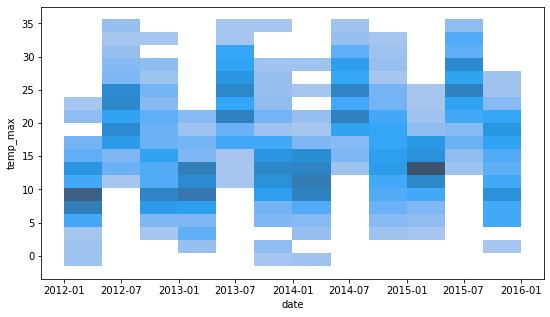

In [214]:
#showing histogram of maximum temperatures over the years
fig = plt.figure(figsize=(9.0, 5.0))
sns.histplot(df,x=df['date'],y=df['temp_max'])


<AxesSubplot: xlabel='date', ylabel='temp_min'>

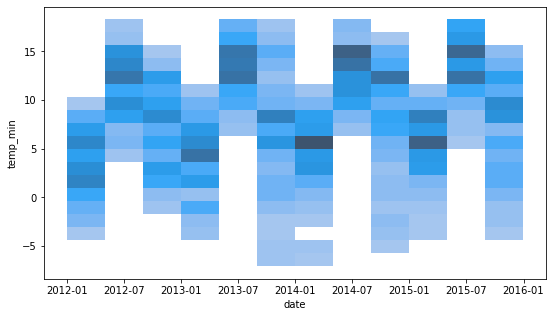

In [216]:
#showing histogram of minimum temperatures over the years
fig = plt.figure(figsize=(9.0, 5.0))
sns.histplot(df,x=df['date'],y=df['temp_min'])


c:\Users\murar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='temp_min', ylabel='temp_max'>

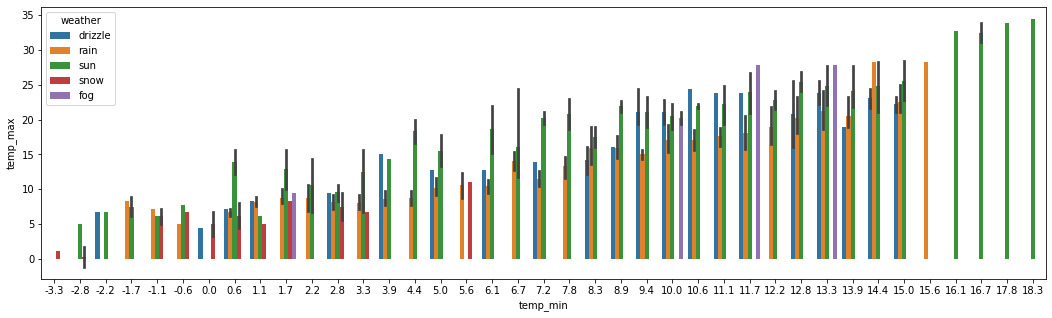

In [235]:
#representation of weather with different temperatures in a year.
yr=df[:365]
yr[360:]
fig = plt.figure(figsize=(18.0, 5.0))
sns.barplot(yr['temp_min'],yr['temp_max'],hue=yr['weather'])
